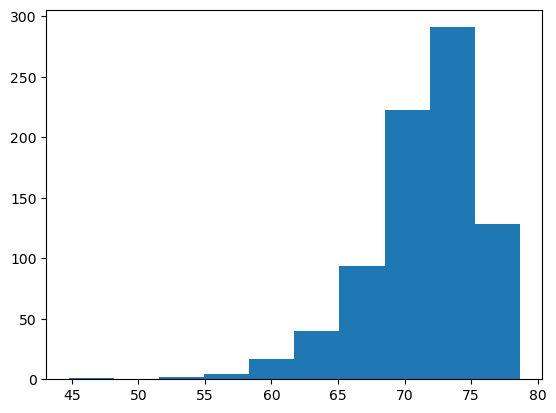

In [125]:
#INMAS Worksop4: Group A: Simulating fulfillment center
# @c: Ben, Issac, Sultan, Vlassis, Yantao
# for 1<=i<=M, the i-th order has length n_i = sum_j n_ij where n_ij means the number of product j in i-th order (1<=j<=N).
# we consider the following setup: (for any i) n_ij ~ Geom(1/(1+|w_j|))-1 where w_j ~ N(0,1). Here we assume n_ij are independent in i

import math
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_orderbook(N, M):
    omega = np.random.normal(0, 0.4, N)
    omega = abs(omega)
    nij = np.random.geometric(p=1 / (1 + omega), size=(M, N)) - 1
    # wjlist counts the total amount that each product is boungt, and this empirical sum measures how popular each product is
    wjlist = [sum([nij[i][j] for i in range(M)]) for j in range(N)]
    orderbook = []
    for i in range(M):
        orderbook.append(np.concatenate([[j] * nij[i, j] for j in range(N)]))

    return [orderbook, wjlist]

def find_item_index(given_list, p):
    """It finds the index of the closest element of given_list to point p"""
    dist_list = []
    for item in given_list:
        dist_list.append(math.dist(p, item))
    index = dist_list.index(min(dist_list))
    return index


def sort_fun(given_list):
    """Finds the path of the robot"""
    output_list = []
    index = find_item_index(given_list, [0, 0])
    output_list.append(given_list[index])
    given_list = given_list[0:index] + given_list[index + 1:]
    while given_list:
        index = find_item_index(given_list, output_list[-1])
        output_list.append(given_list[index])
        given_list = given_list[0:index] + given_list[index + 1:]
    return output_list


def robot_dist(given_list):
    """Computes the total distance travelled by the robot"""
    if not given_list:
        return 0
    seq = sort_fun(given_list)
    dist = math.dist([0, 0], seq[0])
    for i in range(len(seq) - 1):
        dist += math.dist(seq[i], seq[i + 1])
    #dist += math.dist(seq[-1],[0,0])
    return dist


# given N number of items, which is assumed to be divisible by 4, output a list of coordinates on the square
# this functions returns a list
def position_function(N):
    list = []
    intN = int(N/4)
    #list.append([[i+1,0] for i in range(intN)])
    #list.append([[0,i+1] for i in range(intN)])
    #list.append([[intN+1,i+1] for i in range(intN)])
    #list.append([[i+1,intN+1] for i in range(intN)])
    #list = np.concatenate(list)
    for i in range(intN):
        list.append([i+1,0])
        list.append([0, i+1])
    for i in range(intN):
        list.append([i+1, intN+1])
        list.append([intN+1, i+1])
    return list


def OrderToCoord(order, wjlist, N):
# given order and number of items, return the coordinates of these items in a list
    a = position_function(N)
    # we sort wjlist in descendent way so that the most popular product is placed nearby origin, and least popular product away from origin. 
    # We can also replace -1 by 1 which will place popular products away and nonpopular products nearby origins (This tests who distance depends on allocation of products)
    sorting_index = (np.argsort(wjlist))[::-1]
    #sorting_index = np.arange(N)
    diction = {i: a[sorting_index[i]] for i in range(N)}
    coord = [diction[item] for item in order]
    return coord

def DistanceList(N, M):
    [orderbook,wjlist] = generate_orderbook(N, M)
    arr_len = []
    for i in range(M):  
        item0 = list(set(orderbook[i])) #np.ndarray.tolist(orderbook[i])
        item0 = OrderToCoord(item0, wjlist, N)
        arr_len.append(robot_dist(item0))
    return arr_len


arr_len = DistanceList(80,800)

plt.hist(arr_len)
plt.show()
